# PCA_COS 코드에 모든 과정 정리

# 표준화 후 유클리드 거리 기반 군집화
1. kmeans
2. agg
3. meanshift
4. spectral

# 기본설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
user_data = pd.read_csv('/content/drive/MyDrive/평진/데이터분석/FIFA_ONLINE4_analysis/데이터/user_data.csv',encoding='cp949',index_col=0)
user_data.head()

,id_formation,matchType,possession,shootInPenalty,shootHeading,shootOutPenalty,shootTotal,in_rate,out_rate,heading_rate,...,center,line2,center_fw_one,center_mf_one,side_fw_one,side_df_one,center_one,side_one,line2_one,cnt
0,004ed741426633f14e3e8b5b_442,50.0,0.526000,3.200000,1.100000,2.800000,7.100000,0.604722,0.395278,0.130556,...,5.0,4.0,45.200000,41.325000,25.00000,11.800000,42.766667,14.525000,35.800000,10.0
1,009357e613446985dfd18622_451,50.0,0.489375,2.875000,0.937500,4.000000,7.812500,0.501940,0.498060,0.129230,...,4.0,5.0,28.437500,37.250000,24.90625,15.000000,35.046875,19.953125,32.312500,16.0
2,00c0fec278956d51bb63a3a2_523,50.0,0.522667,3.266667,3.533333,1.533333,8.333333,0.832239,0.167761,0.429663,...,5.0,2.0,34.977778,37.533333,NaN,18.266667,36.000000,18.266667,37.533333,15.0
3,01247880cf81e161d85bf2f3_523,50.0,0.488182,2.545455,1.000000,3.272727,6.818182,0.523737,0.476263,0.154545,...,5.0,2.0,28.787879,27.954545,NaN,18.454545,28.454545,18.454545,27.954545,11.0
4,014c6e8a031b7941ee2f9b24_433,50.0,0.503750,4.687500,0.875000,1.437500,7.000000,0.817560,0.182440,0.121354,...,4.0,3.0,32.750000,28.958333,22.37500,14.656250,29.906250,18.515625,28.958333,16.0


In [4]:
# 포메이션 결합용 데이터
data = pd.read_csv('/content/drive/MyDrive/평진/데이터분석/핍파/data.csv',encoding='cp949',index_col=0)
data.head()

,matchId,matchDate,matchType,matchInfo,id,accessId,possession,nickname,matchResult,shootInPenalty,...,center_fw_one,center_mf_one,side_fw_one,side_df_one,center_one,side_one,line2_one,formation,id_formation,cnt
0,6430c714a4ebcc072d13f3e7,2023-04-08T10:54:55,50,"{'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...",4b0a833e4121d0c3f6dc9a2e,4b0a833e4121d0c3f6dc9a2e,0.53,솔깃한,패,2,...,21.0,31.666667,22.5,14.0,29.00,18.25,28.0,451,4b0a833e4121d0c3f6dc9a2e_451,13
1,642dcb56dc1ac4544c53deb8,2023-04-06T04:37:10,50,"{'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...",4b0a833e4121d0c3f6dc9a2e,4b0a833e4121d0c3f6dc9a2e,0.62,솔깃한,승,2,...,34.0,34.333333,30.0,16.0,34.25,23.00,32.6,451,4b0a833e4121d0c3f6dc9a2e_451,13
2,642c09958e38507a9ae58bc4,2023-04-04T20:37:05,50,"{'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...",4b0a833e4121d0c3f6dc9a2e,4b0a833e4121d0c3f6dc9a2e,0.46,솔깃한,패,3,...,40.0,23.333333,17.5,12.0,27.50,14.75,21.0,451,4b0a833e4121d0c3f6dc9a2e_451,13
3,642b2e2be02c06eebd0216c2,2023-04-04T05:01:48,50,"{'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...",4b0a833e4121d0c3f6dc9a2e,4b0a833e4121d0c3f6dc9a2e,0.55,솔깃한,패,2,...,30.0,36.333333,18.5,15.5,34.75,17.00,29.2,451,4b0a833e4121d0c3f6dc9a2e_451,13
4,6426c6325f5c0fd461f34f51,2023-03-31T20:50:42,50,"{'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...",4b0a833e4121d0c3f6dc9a2e,4b0a833e4121d0c3f6dc9a2e,0.47,솔깃한,패,1,...,25.0,34.000000,24.5,13.5,31.75,19.00,30.2,451,4b0a833e4121d0c3f6dc9a2e_451,13


In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1237 entries, 0 to 1236
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_formation       1237 non-null   object 
 1   matchType          1237 non-null   float64
 2   possession         1237 non-null   float64
 3   shootInPenalty     1237 non-null   float64
 4   shootHeading       1237 non-null   float64
 5   shootOutPenalty    1237 non-null   float64
 6   shootTotal         1237 non-null   float64
 7   in_rate            1237 non-null   float64
 8   out_rate           1237 non-null   float64
 9   heading_rate       1237 non-null   float64
 10  passTry            1237 non-null   float64
 11  shortPassTry       1237 non-null   float64
 12  longpassTry        1237 non-null   float64
 13  throughpass        1237 non-null   float64
 14  short_rate         1237 non-null   float64
 15  long_rate          1237 non-null   float64
 16  thr_rate           1237 

# EDA

In [6]:
user_data = pd.merge(user_data,data[['id_formation','formation']],on='id_formation',how='left')
user_data.drop_duplicates(inplace=True)
user_data['df_one'] = (user_data['center_df_posses'] + user_data['center_df_pass']) / user_data['df']

In [53]:
df = user_data[['in_rate','heading_rate','short_rate','long_rate','side_one','center_one','df_one','formation']]
df

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one,formation
0,0.604722,0.130556,0.880041,0.035906,14.525000,42.766667,4.050000,442
10,0.501940,0.129230,0.779673,0.068342,19.953125,35.046875,4.109375,451
26,0.832239,0.429663,0.798512,0.060786,18.266667,36.000000,4.506667,523
41,0.523737,0.154545,0.772228,0.058769,18.454545,28.454545,4.690909,523
52,0.817560,0.121354,0.610595,0.051902,18.515625,29.906250,3.515625,433
...,...,...,...,...,...,...,...,...
18243,0.758310,0.057586,0.832230,0.010402,12.058824,34.000000,4.458824,523
18260,0.668385,0.026984,0.785109,0.035314,16.464286,36.571429,3.553571,451
18274,0.570991,0.161253,0.685540,0.075551,21.450000,26.633333,4.616667,451
18289,0.381407,0.161710,0.806856,0.032023,17.475000,29.080000,3.720000,523


In [54]:
df.corr()

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one,formation
in_rate,1.000000,0.217464,-0.142721,0.095322,0.068067,-0.062307,-0.110787,-0.051412
heading_rate,0.217464,1.000000,-0.258018,0.428485,0.059299,-0.243057,-0.014274,0.012071
short_rate,-0.142721,-0.258018,1.000000,-0.292023,0.167373,0.476015,-0.060109,0.037753
long_rate,0.095322,0.428485,-0.292023,1.000000,-0.057169,-0.382494,-0.033941,-0.027790
side_one,0.068067,0.059299,0.167373,-0.057169,1.000000,0.333778,-0.080366,-0.154445
center_one,-0.062307,-0.243057,0.476015,-0.382494,0.333778,1.000000,0.025138,0.017061
df_one,-0.110787,-0.014274,-0.060109,-0.033941,-0.080366,0.025138,1.000000,0.340284
formation,-0.051412,0.012071,0.037753,-0.027790,-0.154445,0.017061,0.340284,1.000000


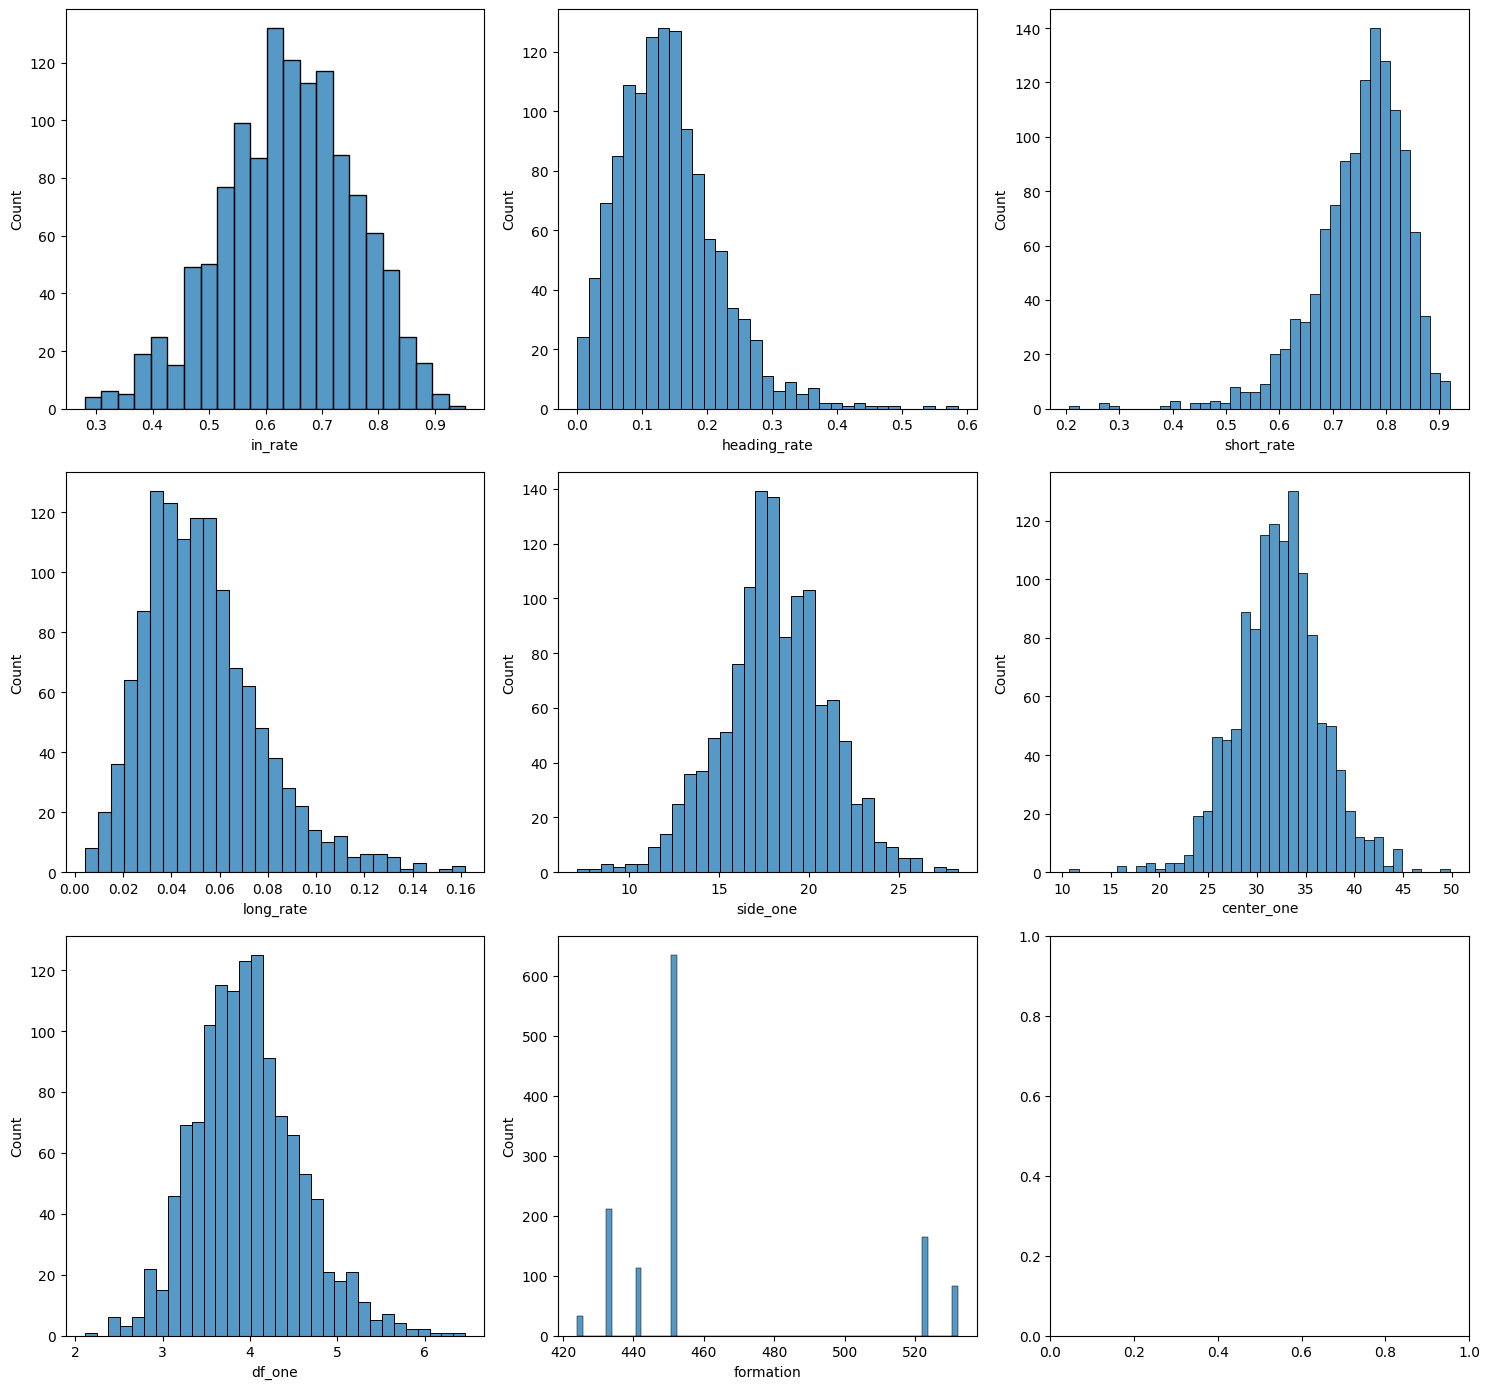

In [55]:
# 데이터프레임 df의 모든 변수들에 대한 히스토그램을 그립니다.
fig, axs = plt.subplots(nrows=len(df.columns)//3+1, ncols=3, figsize=(15, 5*len(df.columns)//3+1))

for i, var in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=var, ax=axs[row, col])

plt.tight_layout()
plt.show()


In [56]:
df.describe()

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one,formation
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000
mean,0.640656,0.140074,0.751178,0.052804,18.074589,32.296207,3.968538,461.324171
std,0.117211,0.077061,0.086592,0.024209,2.949930,4.336384,0.596678,33.136633
min,0.279927,0.000000,0.206241,0.004125,7.088235,10.766667,2.107692,424.000000
25%,0.562881,0.085967,0.707932,0.035598,16.359375,29.597222,3.562500,442.000000
50%,0.644892,0.131471,0.766860,0.049272,17.984375,32.333333,3.937500,451.000000
75%,0.721131,0.182216,0.810287,0.065761,19.950000,34.921053,4.314286,451.000000
max,0.953549,0.585606,0.920070,0.161810,28.281250,49.796875,6.464286,532.000000


# eliminate outlier : logical & 1.5 ~ 3 IQR

In [57]:
# 추가 이상치 제거 >> 표준화에 영향을 주지않을정도로만..
df = df[df.center_one > 17]
df = df[df.center_one < 46]
df = df[df.side_one > 5]
df = df[df.heading_rate < 0.5] 
df = df[df.short_rate > 0.3]
#df = df[df.defence_fw < 15]

In [12]:
# pairplot 그리기
sns.pairplot(data=df,hue='formation')

Output hidden; open in https://colab.research.google.com to view.

In [58]:
df.drop('formation',axis=1,inplace=True)

In [59]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 

scaler = StandardScaler()
x = scaler.fit_transform(df) # x객체에 x를 표준화한 데이터를 저장
features = ['in_rate','heading_rate','short_rate','long_rate','side_one','center_one','df_one']
X = pd.DataFrame(x, columns=features)
X.head()

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
0,-0.302269,-0.114886,1.551117,-0.696068,-1.209063,2.498382,0.138116
1,-1.182020,-0.132810,0.326506,0.652081,0.638236,0.646669,0.238766
2,1.645137,3.928455,0.556365,0.338051,0.064301,0.875291,0.912237
3,-0.995450,0.209409,0.235672,0.254207,0.128240,-0.934605,1.224557
4,1.519489,-0.239271,-1.736445,-0.031213,0.149026,-0.586391,-0.767732


In [60]:
round(X.describe(),3)

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
count,1226.000,1226.000,1226.000,1226.000,1226.000,1226.000,1226.000
mean,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-3.082,-1.880,-4.450,-2.017,-3.740,-3.348,-2.659
25%,-0.663,-0.715,-0.543,-0.708,-0.584,-0.647,-0.684
50%,0.040,-0.103,0.171,-0.144,-0.034,0.008,-0.053
75%,0.682,0.576,0.701,0.526,0.637,0.617,0.583
max,2.683,4.731,2.040,4.537,3.472,2.954,3.986


# Clustering
## 1. meanshift

In [61]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 3.003


In [62]:
from sklearn.cluster import MeanShift
from collections import Counter

# MeanShift 알고리즘 객체 생성
ms = MeanShift(bandwidth=3.003)

# 데이터 X에 대해 군집화 수행
cluster_labels = ms.fit_predict(X)

# 군집화 결과 출력
labels = ms.labels_
centroids = ms.cluster_centers_

print(f"Mean Shift Cluster 유형: {np.unique(cluster_labels)}")
print(Counter(labels))
result = pd.DataFrame(centroids,columns=features)
result

Mean Shift Cluster 유형: [0 1]
Counter({0: 1216, 1: 10})


,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
0,-0.048704,-0.095642,0.133698,-0.118601,0.005104,0.051196,-0.076429
1,0.764221,-0.865887,0.423504,4.247985,-3.117692,-3.199761,-0.737714


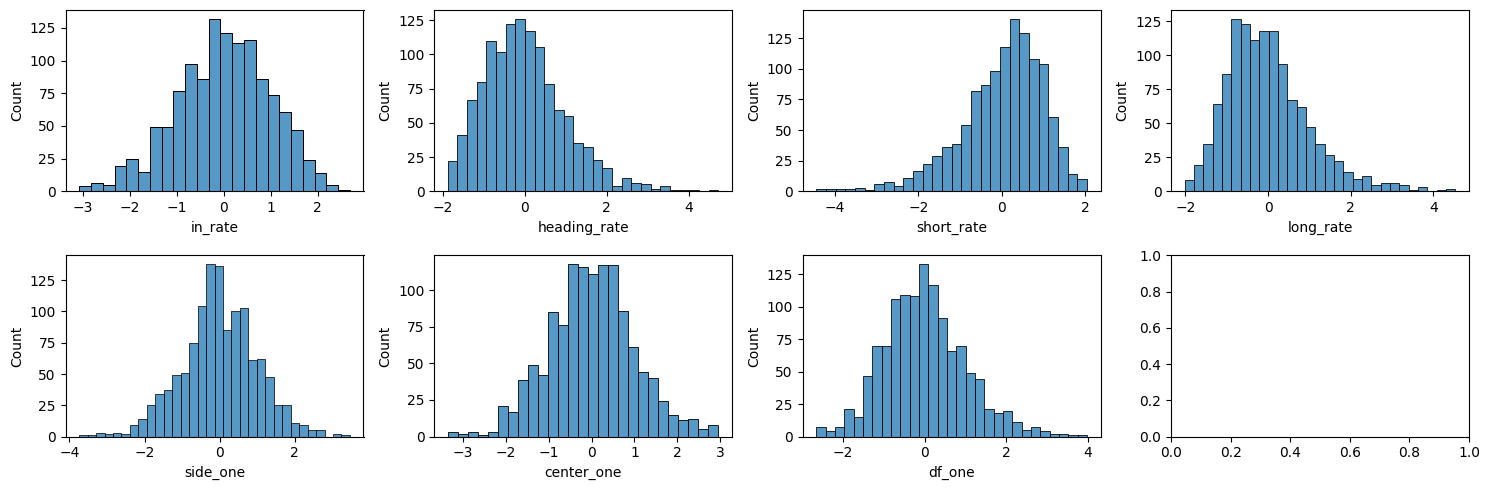

In [63]:
# 분포 확인 후 해석
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))

for i, var in enumerate(X.columns):
    col = i if i<4 else i-4
    row = 0 if i<4 else 1
    sns.histplot(data=X, x=var, ax=axs[row,col])

plt.tight_layout()
plt.show()


# 유클리드의 경우 이상치 탐지 느낌으로 되서 의미없음
0. 밸런스형 : 모든값이 평균
1. 
***
# Kmeans

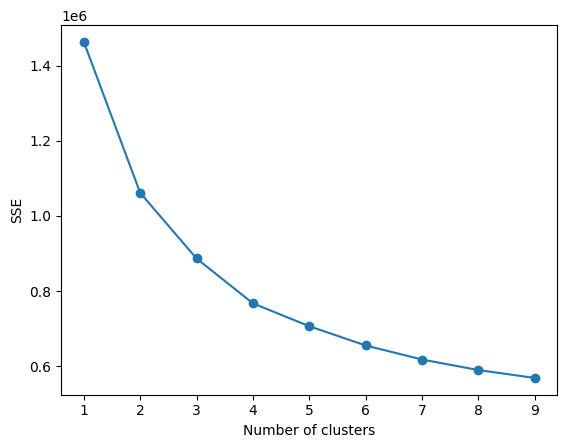

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
# iris 데이터셋 로드

# SSE 값을 저장할 리스트 생성
sse = []

# 군집 개수를 1에서 10까지 변화시키면서 KMeans 알고리즘 적용
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0,n_init=10)
    # 거리 행렬 계산
    distances = pairwise_distances(X, metric='euclidean')
    km.fit(distances)
    sse.append(km.inertia_)

# 군집 개수에 따른 SSE 그래프 출력
plt.plot(range(1,10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

4 부터 완만해짐

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

def plot_silhouette(X, range_n_clusters, metrics):
    """
    X : 입력 데이터
    range_n_clusters : 군집 개수 범위 (list 형태)
    """
    for n_clusters in range_n_clusters:
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(9, 7)

        # 클러스터링 모델 학습
        #clusterer = GaussianMixture(n_components=n_clusters, random_state=42)
        clusterer = KMeans(n_clusters=n_clusters, random_state=0,n_init=10)
        distances = pairwise_distances(X, metric=metrics)
        cluster_labels = clusterer.fit_predict(distances)

        # 모든 샘플의 실루엣 계수를 계산
        silhouette_avg = silhouette_score(distances, cluster_labels)
        sample_silhouette_values = silhouette_samples(distances, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # i번째 클러스터에 속한 샘플들의 실루엣 계수 값을 추출하여 정렬
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)

            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # 클러스터 이름 및 평균 실루엣 계수 값을 그래프에 입력
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            ax.text(0.8, y_lower + 0.5 * size_cluster_i,
                    str(round(np.mean(ith_cluster_silhouette_values), 2)))
            y_lower = y_upper + 10

        ax.set_title("Number of clusters : " + str(n_clusters))
        ax.set_xlabel("Silhouette Coefficient Values :{mean}".format(mean=round(silhouette_avg,2)))
        ax.set_ylabel("Cluster Label")

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax.set_yticks([])  # Clear the yaxis labels / ticks
        ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.show()


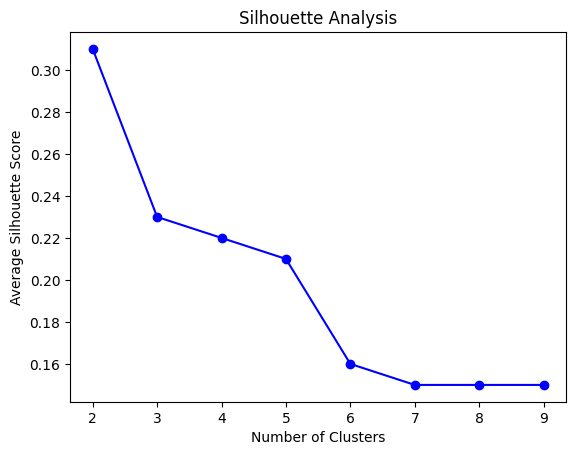

In [21]:
# 군집 개수 범위 설정
k_min, k_max = 2, 9
k_range = range(k_min, k_max+1)

# 각 군집 개수마다 군집 수행 및 실루엣 점수 계산
sil_scores = []
for k in k_range:
    clusterer = KMeans(n_clusters=k, random_state=0, n_init=10)
    distances = pairwise_distances(X, metric='euclidean')
    cluster_labels = clusterer.fit_predict(distances)
    sil_score = silhouette_score(distances, cluster_labels)
    sil_scores.append(round(sil_score,2))

# 평균 실루엣 점수 시각화
plt.plot(k_range, sil_scores, 'o-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis')
plt.xticks(k_range)
plt.show()

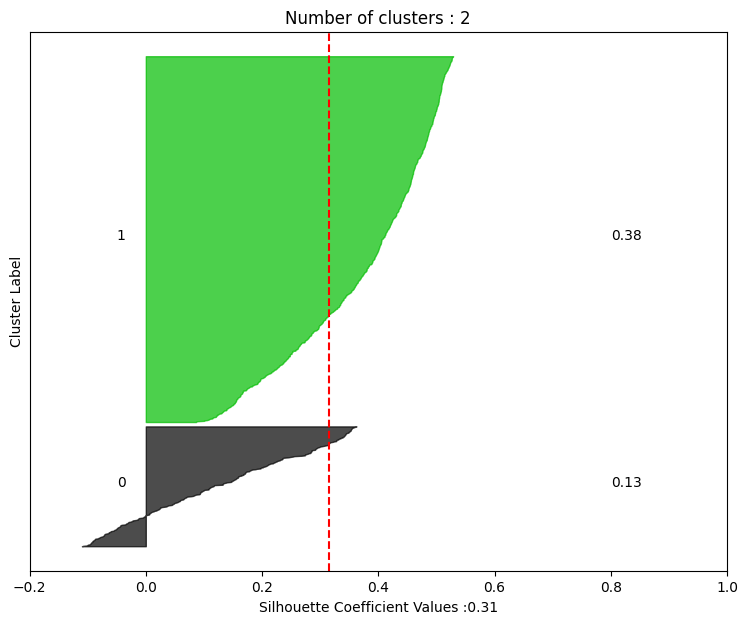

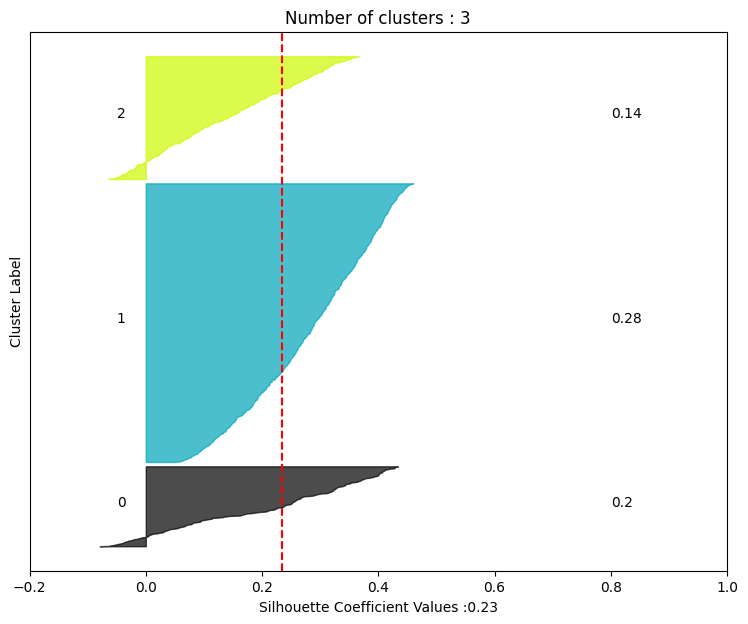

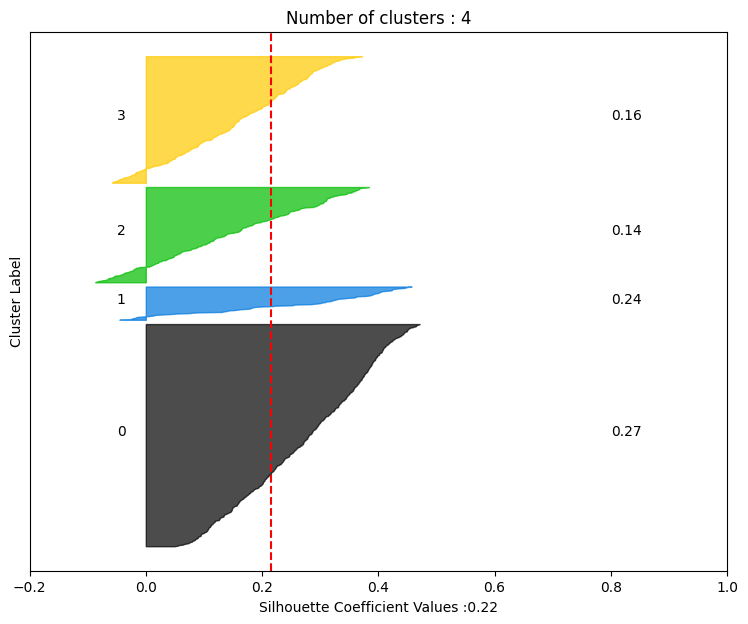

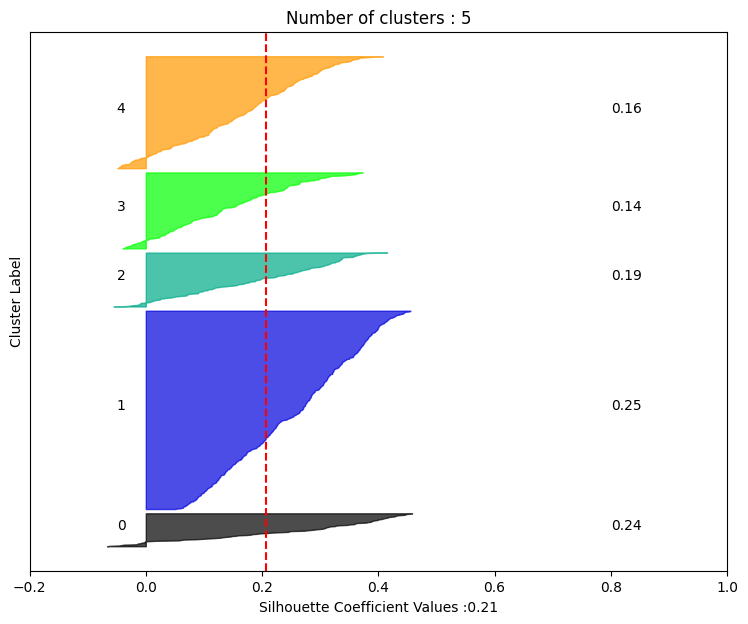

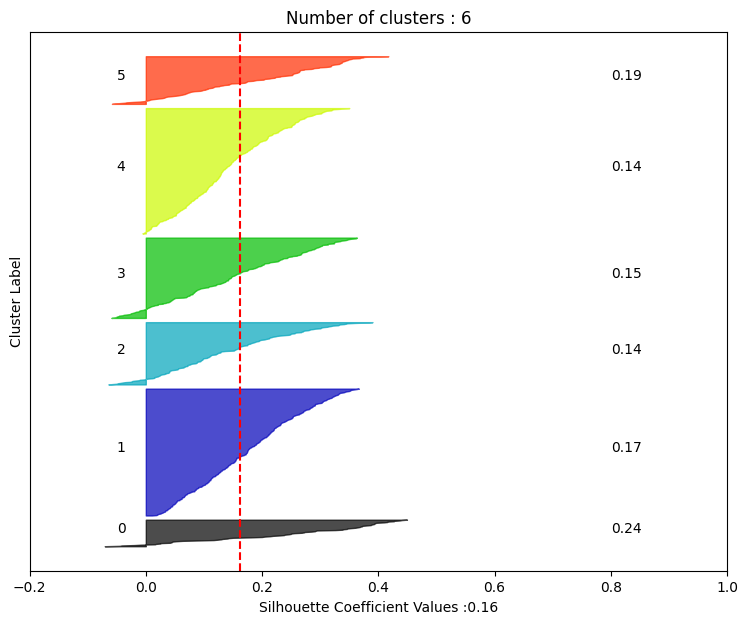

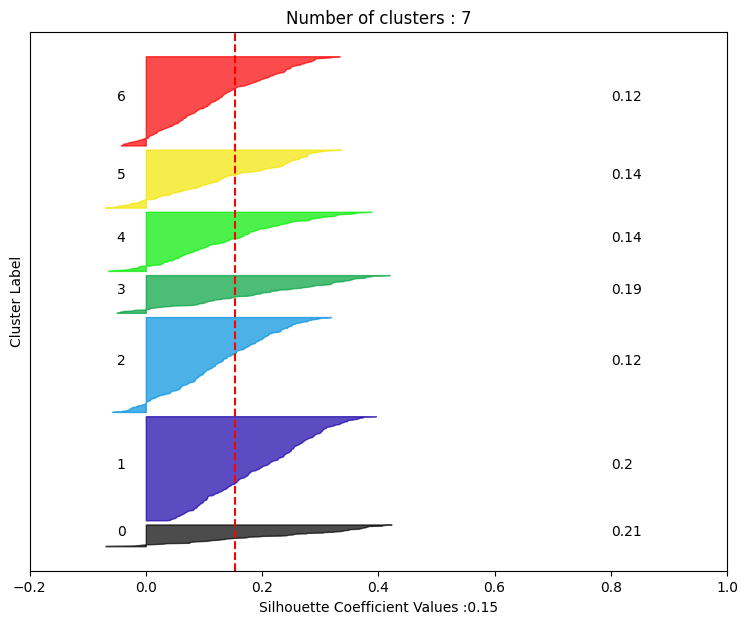

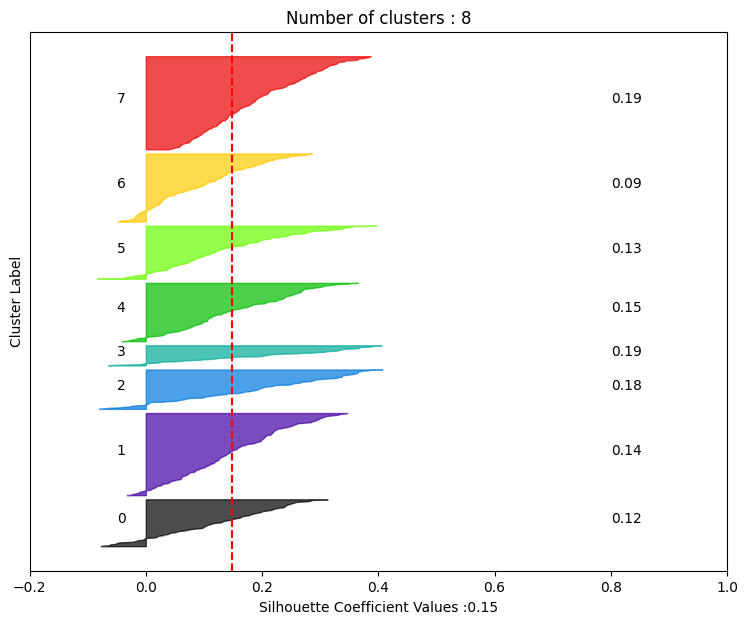

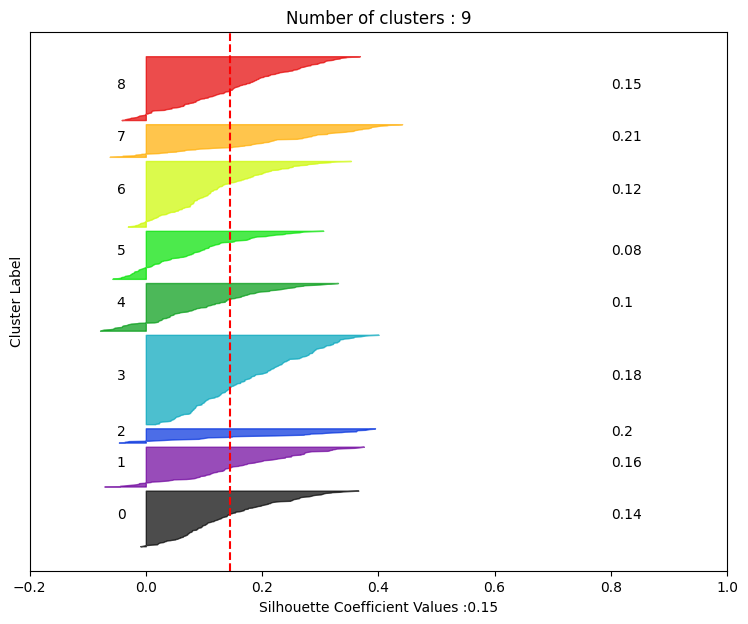

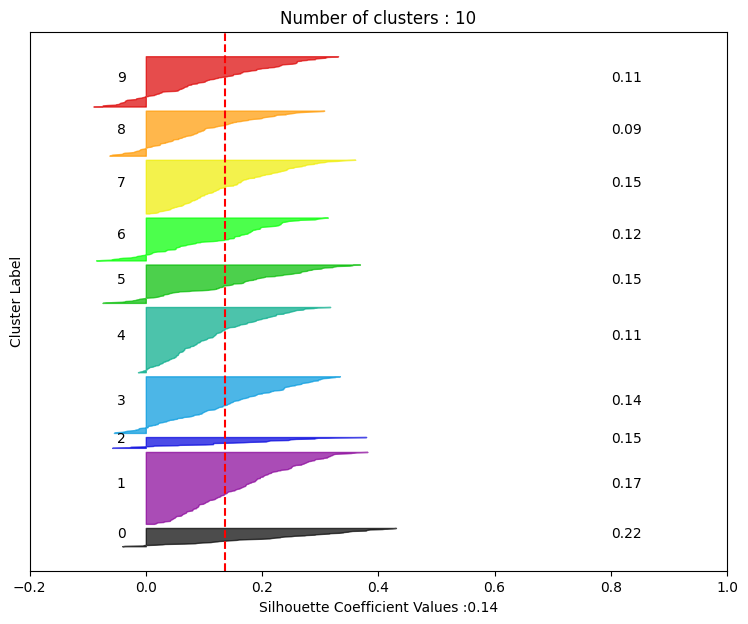

In [22]:
plot_silhouette(X,[2,3,4,5,6,7,8,9,10],'euclidean')

In [23]:
# KMeans 군집화
distances = pairwise_distances(X, metric='euclidean')
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10).fit(distances)


# 군집별 평균값 계산
print(pd.DataFrame(X).groupby(kmeans.predict(distances)).size())
cluster_kmeans = pd.DataFrame(X).groupby(kmeans.labels_).mean()
cluster_kmeans

0    570
1     86
2    245
3    325
dtype: int64


,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
0,-0.043461,-0.141649,0.261624,-0.189322,0.076170,0.172160,-0.168408
1,0.307175,1.211685,-1.288973,1.534255,-0.523038,-1.161991,0.520908
2,-0.383089,-0.674559,0.719641,-0.711894,0.415316,0.890463,0.222739
3,0.283731,0.436313,-0.660266,0.462712,-0.308270,-0.665734,-0.010390


In [24]:
pd.DataFrame(scaler.inverse_transform(X),
             columns=features).groupby(kmeans.labels_).mean()

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
0,0.634959,0.128576,0.774355,0.048098,18.301542,33.068649,3.869176
1,0.675924,0.228689,0.647269,0.089567,16.540823,27.506575,4.275815
2,0.595280,0.089154,0.811894,0.035525,19.298092,36.063252,4.099920
3,0.673185,0.171331,0.698798,0.063786,17.171901,29.575469,3.962393


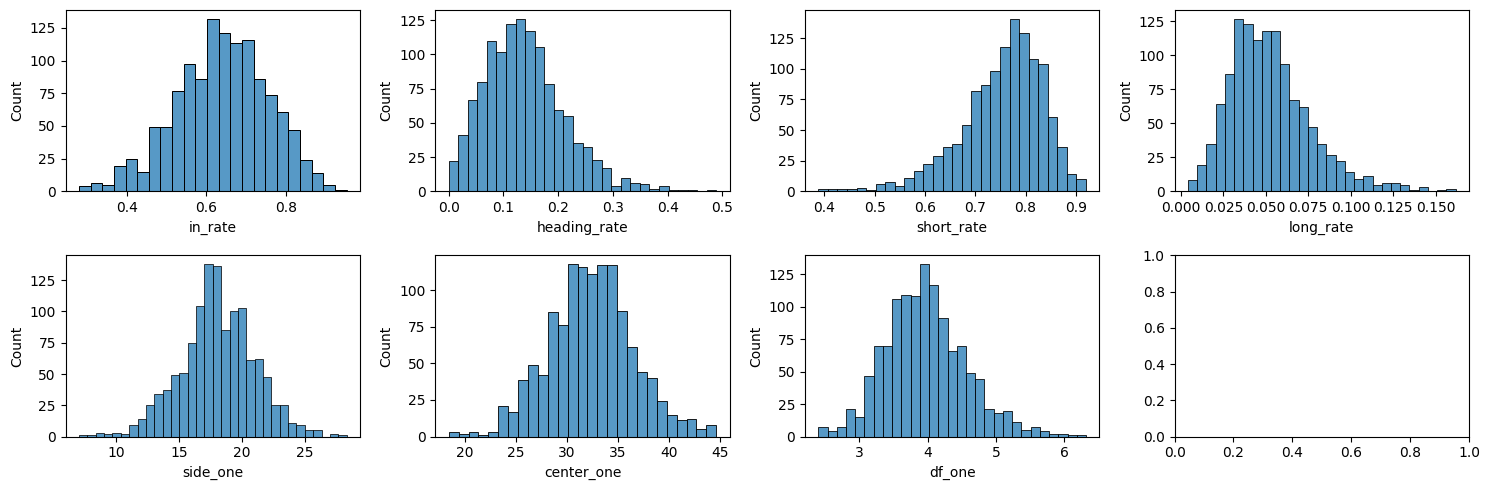

In [25]:
# 분포 확인 후 해석
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))

for i, var in enumerate(df.columns):
    col = i if i<4 else i-4
    row = 0 if i<4 else 1
    sns.histplot(data=df, x=var, ax=axs[row,col])

plt.tight_layout()
plt.show()


In [26]:
df.describe()

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
count,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000
mean,0.640037,0.139054,0.752912,0.052653,18.077724,32.350913,3.968523
std,0.116878,0.074006,0.081993,0.024070,2.939610,4.170700,0.590157
min,0.279927,0.000000,0.388189,0.004125,7.088235,18.394737,2.400000
25%,0.562538,0.086134,0.708409,0.035610,16.361742,29.652431,3.564833
50%,0.644725,0.131421,0.766965,0.049190,17.978299,32.383333,3.937500
75%,0.719692,0.181630,0.810380,0.065318,19.949342,34.925116,4.312500
max,0.953549,0.489052,0.920070,0.161810,28.281250,44.666667,6.320000


1. 밸런스형
2. 다이렉트 패스 크로스유저 역습
3. 중앙집중 중거리 사이드도 많이
4. 선굵은 축구
***
# agg

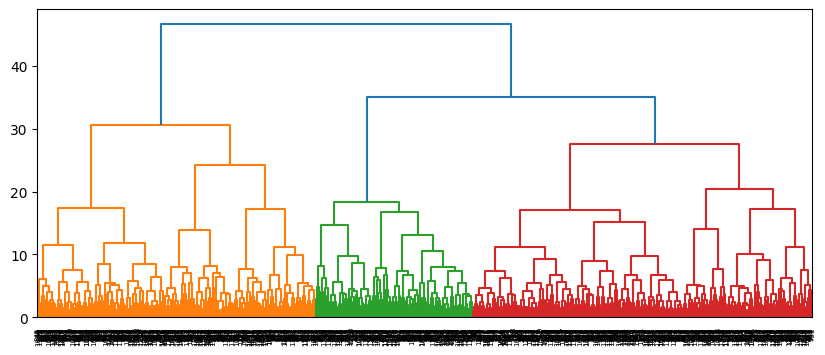

In [66]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# 군집화 모델 생성
agg = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=0, metric='euclidean')

# 모델 학습 및 예측
pred = agg.fit_predict(X)

# dendrogram 그리기
Z = linkage(X, 'ward')
plt.figure(figsize=(10,4))
dendrogram(Z)
plt.show()

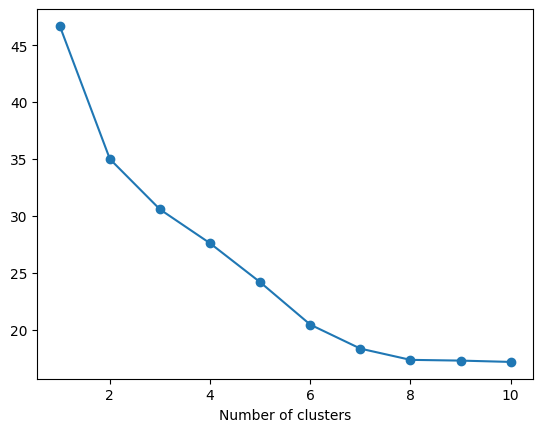

In [28]:
# Elbow Method로 최적의 군집 수 찾기
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev, marker='o')
plt.xlabel('Number of clusters')
plt.show()

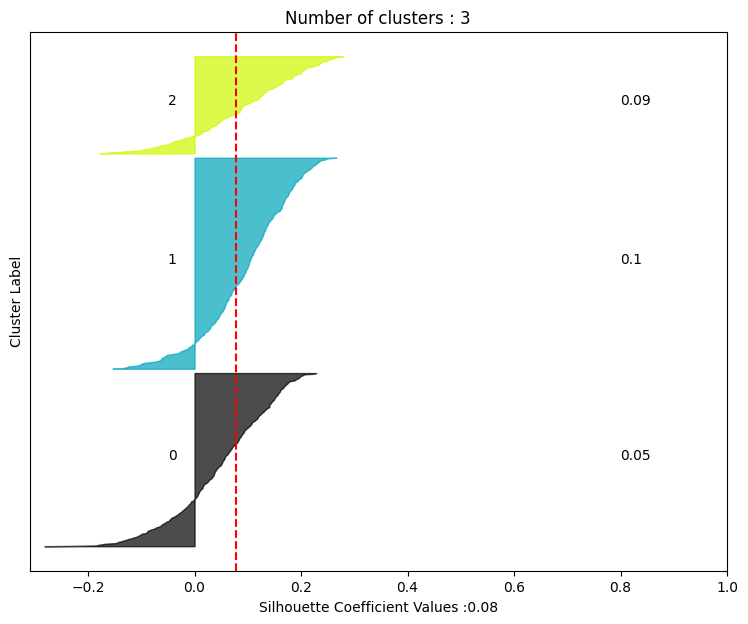

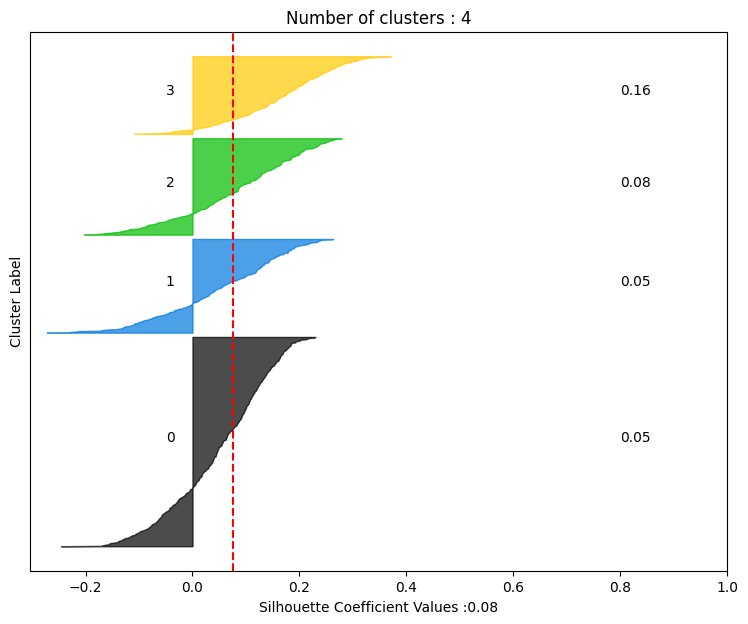

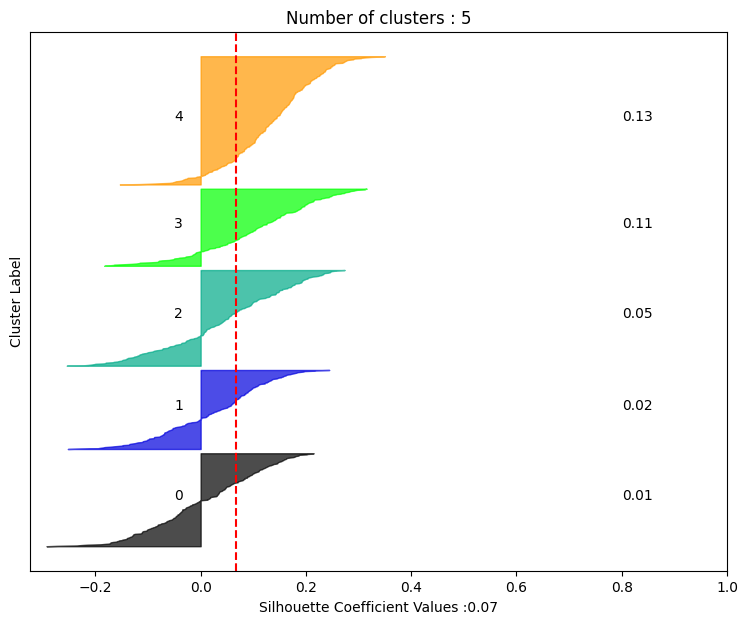

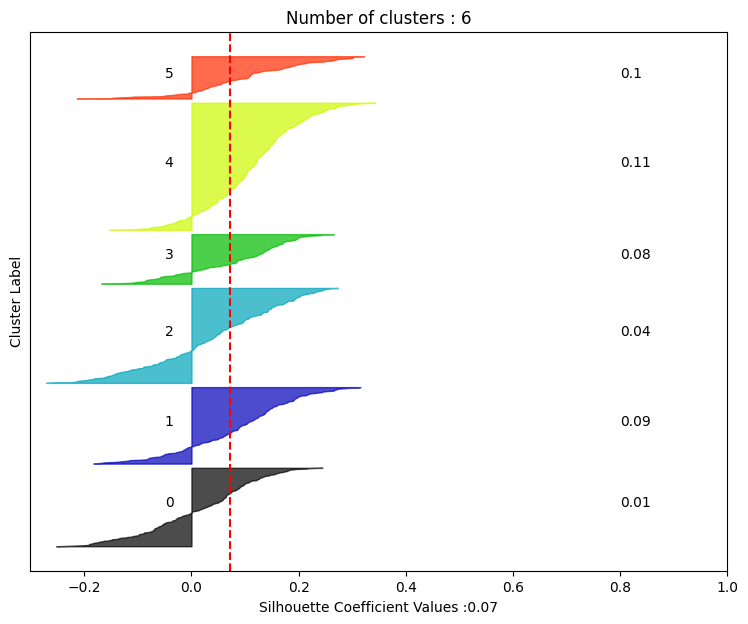

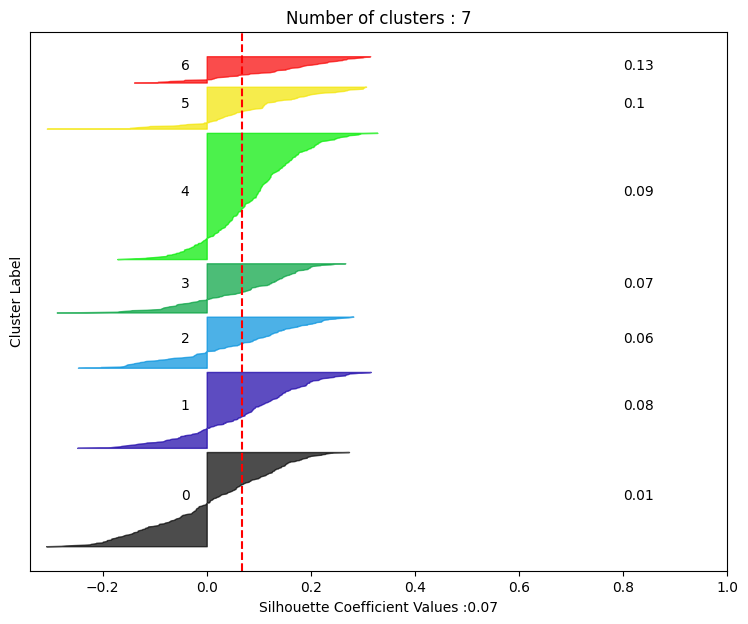

In [78]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering

def plot_silhouette(X, range_n_clusters, metric):
    """
    X : 입력 데이터
    range_n_clusters : 군집 개수 범위 (list 형태)
    metric: 거리 측정 방법
    """
    for n_clusters in range_n_clusters:
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(9, 7)

        # 클러스터링 모델 학습
        agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', distance_threshold=None, metric=metric)
        cluster_labels = agg.fit_predict(X)

        # 모든 샘플의 실루엣 계수를 계산
        silhouette_avg = silhouette_score(X, cluster_labels)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # i번째 클러스터에 속한 샘플들의 실루엣 계수 값을 추출하여 정렬
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)

            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # 클러스터 이름 및 평균 실루엣 계수 값을 그래프에 입력
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            ax.text(0.8, y_lower + 0.5 * size_cluster_i,
                    str(round(np.mean(ith_cluster_silhouette_values), 2)))
            y_lower = y_upper + 10

        ax.set_title("Number of clusters : " + str(n_clusters))
        ax.set_xlabel("Silhouette Coefficient Values :{mean}".format(mean=round(silhouette_avg,2)))
        ax.set_ylabel("Cluster Label")

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax.set_yticks([])  # Clear the yaxis labels / ticks
        ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.show()

plot_silhouette(X,[3,4,5,6,7],'euclidean')


In [72]:
Agg = AgglomerativeClustering(n_clusters=6, linkage='ward',metric='euclidean')

print(pd.DataFrame(df).groupby(Agg.fit_predict(X)).size())
cluster_agg = pd.DataFrame(df).groupby(Agg.fit_predict(X)).mean()
cluster_agg

0    205
1    200
2    248
3    130
4    332
5    111
dtype: int64


,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
0,0.728643,0.213173,0.721560,0.054627,18.454712,32.444950,3.789504
1,0.645102,0.095208,0.812758,0.033610,20.351147,36.975752,3.755595
2,0.662522,0.170722,0.673000,0.074566,16.476197,27.974193,4.135093
3,0.557642,0.085887,0.794806,0.040441,14.450192,32.192898,4.177547
4,0.603049,0.122818,0.768322,0.055374,18.681320,32.117705,3.707941
5,0.624156,0.121249,0.786376,0.040520,19.306527,34.505401,4.845234


In [73]:
df.describe()

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
count,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000
mean,0.640037,0.139054,0.752912,0.052653,18.077724,32.350913,3.968523
std,0.116878,0.074006,0.081993,0.024070,2.939610,4.170700,0.590157
min,0.279927,0.000000,0.388189,0.004125,7.088235,18.394737,2.400000
25%,0.562538,0.086134,0.708409,0.035610,16.361742,29.652431,3.564833
50%,0.644725,0.131421,0.766965,0.049190,17.978299,32.383333,3.937500
75%,0.719692,0.181630,0.810380,0.065318,19.949342,34.925116,4.312500
max,0.953549,0.489052,0.920070,0.161810,28.281250,44.666667,6.320000


1. 인슛
2. 중원과 양 측면에서 숏패스 위주 
3. 역습 후 헤딩
4. 중원 전개 중거리
5. 밸런스
6. 후방 빌드업 선호 차근차근 빌드업
***
# spectral

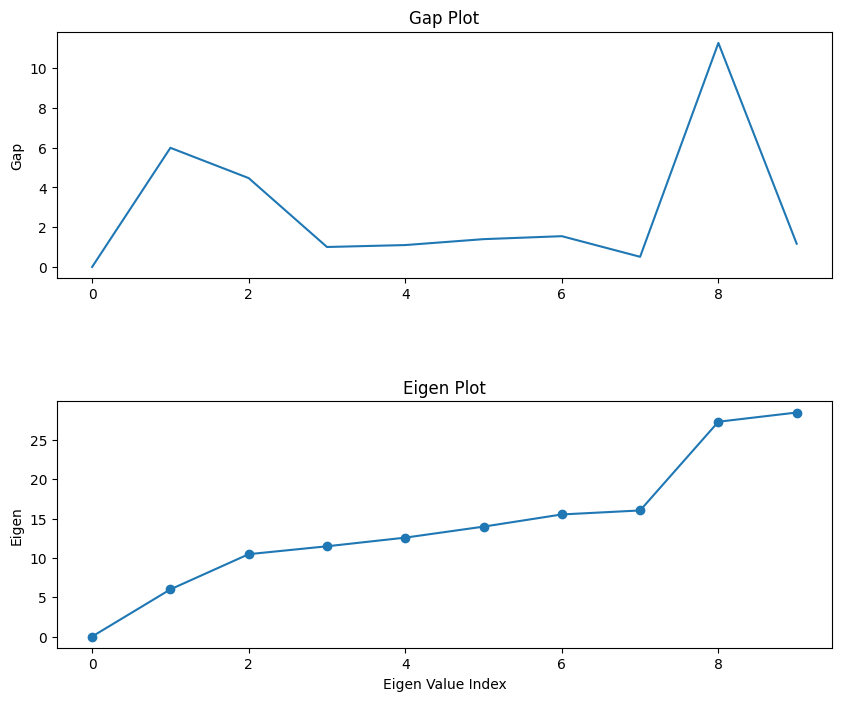

Optimal number of clusters: 8


In [31]:
from sklearn.cluster import SpectralClustering
from scipy.sparse.linalg import eigsh

# 유사도 행렬 생성
distances = pairwise_distances(X, metric='euclidean')
affinity = np.exp(-distances ** 2 / (2. * np.median(distances)))

# Eigenvalue 분해
laplacian = np.diag(affinity.sum(axis=1)) - affinity
eigenvals, eigenvecs = eigsh(laplacian, k=10, which='SM')

# Eigen Gap 계산
gaps = list(np.diff(eigenvals))
gaps.insert(0,0)
# Gap 시각화
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
plt.axes(axes[0])
plt.plot(gaps)
plt.title('Gap Plot')
plt.ylabel('Gap')

plt.axes(axes[1])
plt.plot(eigenvals,marker='o')
plt.title('Eigen Plot')
plt.xlabel('Eigen Value Index')
plt.ylabel('Eigen')

plt.subplots_adjust(hspace=0.5)
plt.show()

# 최적의 군집 개수 계산
k = np.argmax(gaps)
print('Optimal number of clusters:', k)

In [32]:
# Spectral Clustering
sc = SpectralClustering(n_clusters=k, affinity='rbf', assign_labels='kmeans')
labels = sc.fit_predict(X)

Counter(labels)

Counter({0: 1176, 3: 9, 2: 18, 1: 7, 4: 2, 7: 7, 5: 3, 6: 4})

meanshift 처럼 이상치 탐지 느낌남..
***
# visualization

In [33]:
df['cl'] = kmeans.labels_

In [34]:
dfs = df.reset_index(drop=True)

In [35]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

# 데이터 생성
cluster_labels = dfs['cl'].unique()
clusters = [dfs[dfs['cl'] == i] for i in cluster_labels]

# 3D Scatter Plot 생성
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

for i in range(len(cluster_labels)):
    fig.add_trace(
        go.Scatter3d(x=clusters[i]['in_rate'], y=clusters[i]['short_rate'], z=clusters[i]['center_one'], 
                     mode='markers', 
                     marker=dict(size=3, colorscale='Viridis', opacity=0.8), 
                     name=f'Cluster {i}')
    )
    
# 레이아웃 설정
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'), 
                  margin=dict(l=0, r=0, b=0, t=0))

# FigureWidget 생성
fig.show()


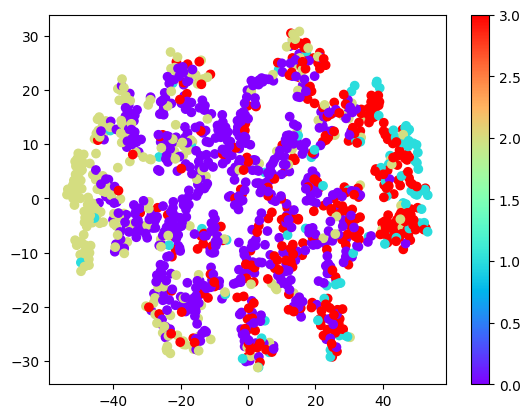

In [36]:
from sklearn.manifold import TSNE

# t-SNE 객체 생성
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# t-SNE 학습
df3 = df.drop('cl',axis=1)
X_embedded = tsne.fit_transform(df3)

labels = kmeans.labels_

# 군집화 결과 시각화
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=labels, cmap='rainbow')
plt.colorbar()
plt.show()

In [37]:
# t-sne 모델 생성
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df3)

# 3D Scatter Plot 생성
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

fig.add_trace(
    go.Scatter3d(x=X_tsne[:,0], y=X_tsne[:,1], z=X_tsne[:,2], 
                 mode='markers', 
                 marker=dict(size=3, color= labels, colorscale='Viridis', opacity=0.8), 
                 name='Clusters')
)

# 레이아웃 설정
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'), 
                  margin=dict(l=0, r=0, b=0, t=0))

# FigureWidget 생성
fig.show()


In [38]:
from scipy.spatial import distance_matrix

# 인접행렬 계산
dist_matrix = distance_matrix(X.values, X.values, p=2)

# 홉킨스 통계량 계산
hopkins_statistic = np.sum(np.square(dist_matrix)) / (2 * (np.square(X.shape[0]) - X.shape[0]))

print(hopkins_statistic)

7.00571428571429


In [39]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz Index 계산
score = calinski_harabasz_score(X, kmeans.labels_)
print("Calinski-Harabasz Index:", score)


Calinski-Harabasz Index: 113.67435527965816


# 포메이션과 접목

In [40]:
user_data.groupby(['formation','labels']).size()

KeyError: ignored

In [ ]:
win_lose = pd.merge(user_data,data[['id_formation','matchResult']],how='left',on='id_formation')
win_lose.groupby(['formation','labels']).matchResult.value_counts()